In [1]:
%matplotlib inline
import matplotlib.pyplot as pl
import seaborn as sb
import numpy as np
sb.set(style='ticks',font_scale=1.5)

# Probability, Odds, and Odds ratios

After reading [this Landerl et (38) al (2013) paper](http://onlinelibrary.wiley.com/doi/10.1111/jcpp.12029/full) on the relationships between childhood dyslexia, performance on various cognitive tasks, and orthographic complexity, I got to thinking about odds ratios. All in all, it's a good paper with impressive scope - they did a very respectable job administering a battery of tests to hundreds of kids who spoke English, French, German, Dutch, Finnish, and Hungarian - and the results are interesting (the basic story being that cognitive predictors of dyslexia tend to exhibit stronger relationships to dyslexia when the mapping between phonemes and graphemes is more complex).

Because the (39!) authors used logistic regression to predict dyslexia as a function of phonemic awareness, digit naming speed, and short term memory, they report and discuss (log) odds ratios quite a bit. Somewhat embarrasingly, given that I've used logistic regression many times, I didn't totally have my head wrapped around how to interpret odds ratios. I usually prefer to use [Gelman & Hill's](http://www.stat.columbia.edu/~gelman/arm/) rule of thumb that dividing a logistic regression coefficient by 4 gives you an approximate upper bound on the change in the probability of an outcome for a unit change in the associated predictor.

I wanted to see what resources there are for interpreting odds ratios, though, and after poking around on Google a bit, I found a few things, none of which really helped all that much (e.g., [this](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2938757/), [this](http://stats.idre.ucla.edu/stata/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/), though [wikipedia does a pretty good job](https://en.wikipedia.org/wiki/Odds_ratio)).

Note that my intention to "interpret odd ratios" relies on the assumption that odds ratios in and of themselves are not particularly meaningful. They provide clear ordinal information, but they don't, as far as I can tell, give us any readily understandable information about how changes in one variable (e.g., gender) are related to changes in the *probability* of a particular outcome (e.g., having dyslexia). Note the additional assumption that probabilities *are* in and of themselves meaningful.

Anyway, I thought it might be useful to get my head wrapped around odds ratio interpretation by writing about it. And so here we are.

## Probability and odds

In order to understand odds *ratios*, we need to first make sure we understand odds. So, suppose the probability of having dyslexia is $p_d$. Then the odds of having dyslexia is $\displaystyle{\frac{p_d}{1-p_d}}$. Here's a figure illustrating the relationship between probability and odds:

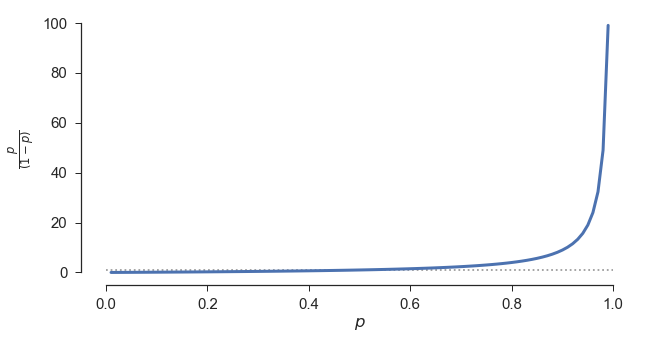

In [2]:
p = np.linspace(0.01,0.99,99)
o = p/(1-p)
fg,ax = pl.subplots(1,1,figsize=(10,5))
ax.plot([0,1],[1,1],':',color=[.5,.5,.5,.8])
ax.plot(p,o,lw=3)
ax.set(xlabel='$p$',ylabel=r'$\frac{p}{(1-p)}$')
sb.despine(ax=ax,trim=True)

Because odds are compressed below 1 (i.e., when $p < 0.5$) and stretched out above 1 (i.e., when $p > 0.5$), it can help to look at *log* odds, which balances out the two halves:

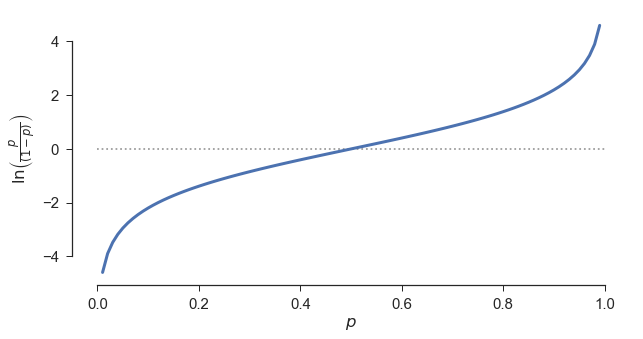

In [3]:
fg,ax = pl.subplots(1,1,figsize=(10,5))
ax.plot([0,1],[0,0],':',color=[.5,.5,.5,.8])
ax.plot(p,np.log(o),lw=3)
ax.set(xlabel='$p$',ylabel=r'$\ln\left(\frac{p}{(1-p)}\right)$')
sb.despine(ax=ax,trim=True)

A key property of probability and odds is that there is a one-to-one mapping between the two. For a given $p_d$, there is a unique $\displaystyle{\frac{p_d}{1-p_d}}$, so if we know one, we know the other (or can readily figure it out). Not so with odds ratios.

## Odds and odds ratios

Odds ratios are useful for research and data analysis (to the extent that they are useful) because they tell us how odds (and so probabilities) change as a function of some other variable. So, to take an example from the Landerl et al paper, if the probability of being dyslexic if you're male is $p_m$ and the probability of being dyslexic if you're female is $p_f$, then the odds ratio (OR) is:

\begin{equation}
OR = \frac{p_f}{1-p_f}\Bigg/\frac{p_m}{1-p_m}
\end{equation}

In the Landerl et al paper, they report this odds ratio as 0.706 (for the full dataset - they report different estimates for different subsets of their data). That is, the odds of being dyslexic if you're female are about 7/10 the odds of being dyslexic if you're male.

Crucially, though, note that there are two unknowns here: $p_m$ and $p_f$. If we knew the *odds* for one or the other, we would know the probability, too. But simply knowing the *odds ratio* doesn't tell us anything about either probability. In fact, there are indefinitely many values for $p_m$ and $p_f$ that will give us an odds ratio of 7/10.

If we know the value for, say, $p_f$, we can set the equation above equal to 7/10 in order to calculate $p_m$. Rearranging terms slightly, we can rewrite the equation above as:

\begin{equation}
OR \times \frac{p_m}{1-p_m} = \frac{p_f}{1-p_f}
\end{equation}

If $p_f = 0.2$ and $OR = 0.7$, then:

\begin{align}
\frac{7}{10} \frac{p_m}{1-p_m} &= \frac{1}{4}\\
\frac{p_m}{1-p_m} &= \frac{5}{14}
\end{align}

Solving for $p_m$, we get $5/19 \approx 0.26$.

On the other hand, if $p_f = 0.4$, and $OR = 0.7$, we end up with $p_m = 20/41 \approx 0.49$.

There's a big difference between 0.26 and 0.49, even though we're dealing with a constant odds ratio for the relationship between gender and dyslexia.

We can illustrate the fact that there can be substantial differences in the underlying probabilities relating to a given odds ratio. If we denote the odds for $p_f$ as $o_f$ and the odds ratio $r$, then $p_m = \displaystyle{\frac{o_f}{r+o_f}}$

Here's a figure illustrating the relationship between $p_m$ and $p_f$ for a few different odds ratios:

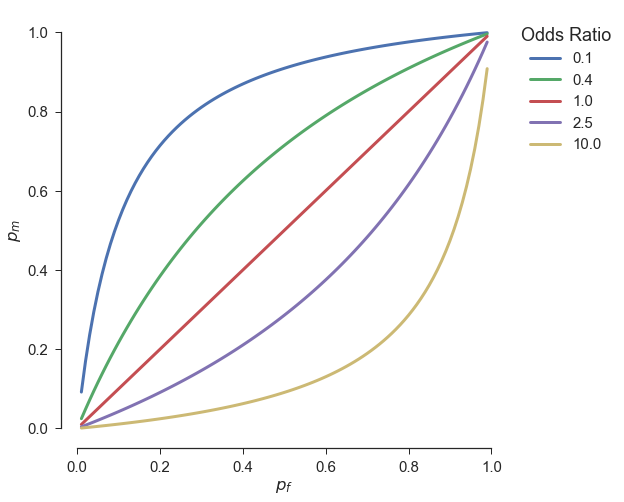

In [4]:
p_f = p
o_f = p_f/(1-p_f)
OR = np.array([.1,.4,1,2.5,10])
fg,ax = pl.subplots(1,1,figsize=(8,8))
lines = []
for oi in OR:
    p_m = o_f/(oi + o_f)
    lt, = ax.plot(p_f,p_m,lw=3)
    lines.append(lt)
sb.despine(ax=ax, trim=True); ax.set(xlabel='$p_f$',ylabel='$p_m$')
pl.legend(lines,OR,loc='upper left',bbox_to_anchor=(1,1),title="Odds Ratio");

This figure illustrates two main points.

First, the ordinal interpretation of an odds ratio is unambiguous. In this example, if the odds ratio is less than one, then $p_m > p_f$ as long as $0 < p_f < 1$, i.e., boys are more likely to be dyslexic than girls, for every baseline value of $p_f$. Similarly, if the odds ratio is greater than one, then $p_m < p_f$, as long as $0 < p_f < 1$.

Second, for odds ratios that are not equal to one, interpretation of the magnitude of the difference between $p_m$ and $p_f$ depends on where you are with respect to one or the other. The odds ratio by itself cannot be interpreted in terms of the probability of having dyslexia, in this example.

In order to drive home the point that the base rate (or prevalence) of the outcome is crucially important to interpreting the odds ratio, here's a figure illustrating $p_m-p_f$, the difference in the probability of having dyslexia for males and females, as a function of base rate values of $p_f$ for the same odds ratios:

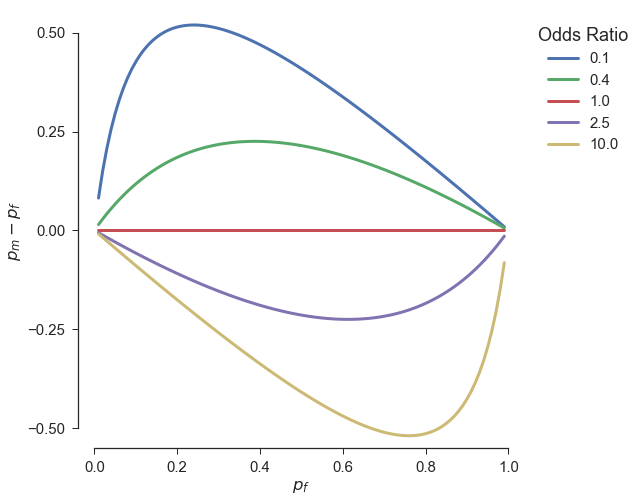

In [5]:
fg,ax = pl.subplots(1,1,figsize=(8,8))
lines = []
for oi in OR:
    p_m = o_f/(oi + o_f)
    lt, = ax.plot(p_f,p_m-p_f,lw=3)
    lines.append(lt)
ax.set(xlabel='$p_f$',ylabel='$p_m-p_f$',ylim=(-.55,.55),yticks=np.linspace(-.5,.5,5))
sb.despine(ax=ax, trim=True)
pl.legend(lines,OR,loc='upper left',bbox_to_anchor=(1,1),title="Odds Ratio");

The difference $p_m-p_f$ varies as a function of $p_f$ (as long as the odds ratio $\neq 1$), and it does so differently for different odds ratios.

Here's a figure illustrating $\displaystyle{\frac{p_m}{p_f}}$, the ratio of the two probabilities, as a function of $p_f$ for the same odds ratios, to further drive this point home:

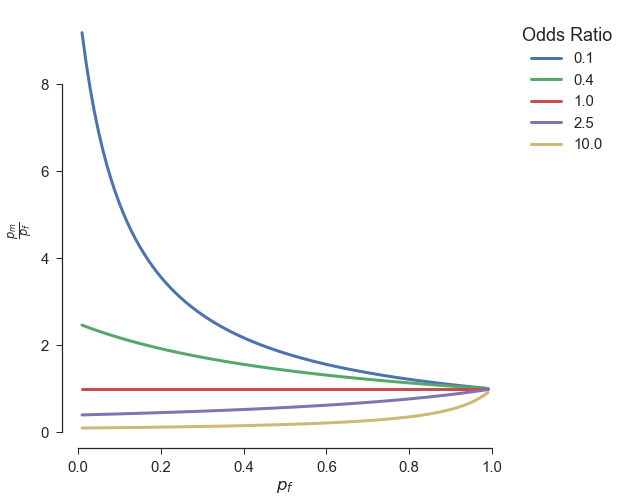

In [6]:
fg,ax = pl.subplots(1,1,figsize=(8,8))
lines = []
for oi in OR:
    p_m = o_f/(oi + o_f)
    lt, = ax.plot(p_f,p_m/p_f,lw=3)
    lines.append(lt)
ax.set(xlabel='$p_f$',ylabel=r'$\frac{p_m}{p_f}$')
sb.despine(ax=ax, trim=True)
pl.legend(lines,OR,loc='upper left',bbox_to_anchor=(1,1),title="Odds Ratio");

As with the differences, the ratio $\displaystyle{\frac{p_m}{p_f}}$ varies with $p_f$, and the nature of this variation is determined by the value of the odds ratio.

The same basic problem applies to second-order relationships between the probabilities $p_m$ and $p_f$. For example, even if we can't interpret odds ratios in terms of the probabilities themselves, we might want to interpret odds ratios in terms of double differences (i.e., the difference of the difference). For example, we might want to look at the difference in the probability of dyslexia as a function of gender for first graders and fourth graders (i.e., $p_{m1}, p_{m4}, p_{f1}, p_{f4}$).

The double difference of these probabilities is:

\begin{equation}
\left(p_{m1} - p_{f1}\right) - \left(p_{m4} - p_{f4}\right)
\end{equation}

If the base rate of dyslexia in females is the same for third and fourth graders - i.e., if $p_{f1} = p_{f4}$ - then this reduces to $p_{m1} - p_{m4}$.

Here's a figure illustrating the double difference of $p_m$ values for four pairs of odds ratios with four-to-one ratios to each other, illustrating that two odds ratios, one of which is four times as large as another, also cannot be interpreted without additional information (e.g., baseline $p_f$ in this example):

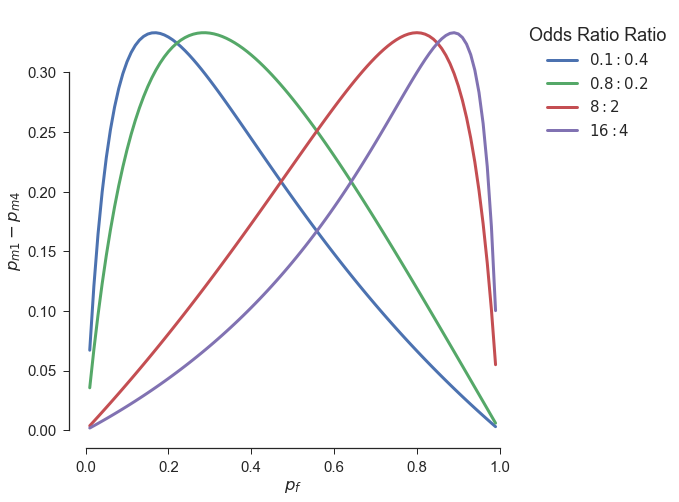

In [7]:
fg,ax = pl.subplots(1,1,figsize=(8,8))
ORR = np.array([[0.1,0.4],[0.2,0.8],[2,8],[4,16]])
lines = []
for ri in range(ORR.shape[0]):
    p_m1 = o_f/(ORR[ri,0] + o_f)
    p_m4 = o_f/(ORR[ri,1] + o_f)
    lt, = ax.plot(p_f,p_m1-p_m4,lw=3)
    lines.append(lt)
ax.set(xlabel='$p_f$',ylabel=r'$p_{m1} - p_{m4}$')
sb.despine(ax=ax, trim=True)
pl.legend(lines,['$0.1:0.4$','$0.8:0.2$','$8:2$','$16:4$'],
          loc='upper left',bbox_to_anchor=(1,1),title="Odds Ratio Ratio");

As with the single difference illustrated above, the double difference varies with $p_f$, and the specific form of this variation changes with the odds ratio ratio.

Finally, we might be interested in ratios of probabilities:

\begin{equation}
\frac{p_{m4}}{p_{f4}}\Bigg/\frac{p_{m1}}{p_{f1}}
\end{equation}

Again, if $p_{f1} = p_{f4}$, this reduces to $\displaystyle{\frac{p_{m4}}{p_{m1}}}$. Here's a figure illustrating this ratio of $p_m$ values for the same four pairs of odds ratios, to further illustrate the general point that odds ratios are not particularly interpretable:

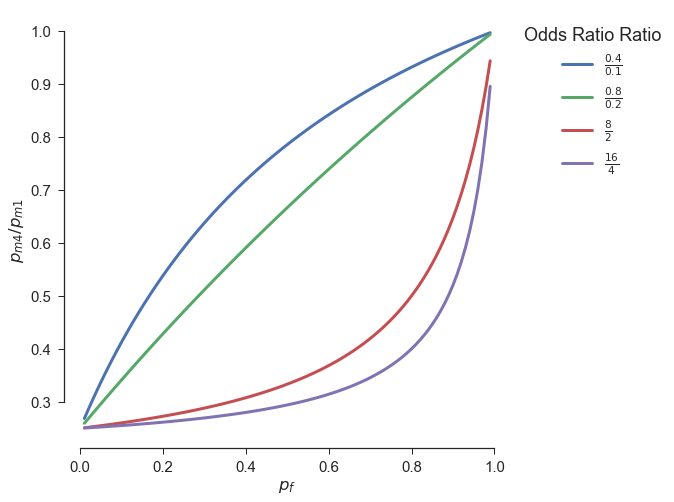

In [8]:
fg,ax = pl.subplots(1,1,figsize=(8,8))
ORR = np.array([[0.1,0.4],[0.2,0.8],[2,8],[4,16]])
lines = []
for ri in range(ORR.shape[0]):
    p_m1 = o_f/(ORR[ri,0] + o_f)
    p_m4 = o_f/(ORR[ri,1] + o_f)
    lt, = ax.plot(p_f,p_m4/p_m1,lw=3)
    lines.append(lt)
ax.set(xlabel='$p_f$',ylabel=r'$p_{m4} / p_{m1}$')
sb.despine(ax=ax, trim=True)
pl.legend(lines,[r'$\frac{0.4}{0.1}$',r'$\frac{0.8}{0.2}$',r'$\frac{8}{2}$',r'$\frac{16}{4}$'],
          loc='upper left',bbox_to_anchor=(1,1),title="Odds Ratio Ratio");

To belabor the point one more time again already, the ratio of $p_m$ probabilities varies as a function of $p_f$, and the nature of this variation depends on the odds ratio. Note that this is true even if, in this case, $p_{f1} = p_{f4}$. The double differences and double ratios aren't going to be easier to interpret if we relax this simplifying assumption.

So, the take home message is that odds ratios don't have any direct interpretation in terms of probabilities, nor in terms of differences or ratios of probabilities.

I suppose my conclusion, then, is that while ordinal interpretation of odds ratios is straightforward, interpretation of the magnitude of odds ratios is essentially impossible without additional information. The Wikipedia article linked above does a pretty good job of discussing this. Most of the other information I've found does not.

Unfortunately, this all seems (to me) to make odds ratios very limited as measures of effect size.